In [15]:
import os
from sklearn.model_selection import train_test_split
import shutil


train_folder = r'C:\Users\MANAN\OneDrive\Desktop\tomato\train'

test_folder = r'C:\Users\MANAN\OneDrive\Desktop\tomato\test'

class_folders = [os.path.join(train_folder, c) for c in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, c))]


if not os.path.exists(test_folder):
    os.makedirs(test_folder)
    
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)
    
    images = [os.path.join(class_folder,img) for img in os.listdir(class_folder)]
    
    if len(images)>=100:
        train_images,test_images = train_test_split(images,test_size=100,random_state=42)
        test_class_folder = os.path.join(test_folder, class_name)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)
        for test_image in test_images:
            shutil.move(test_image, os.path.join(test_class_folder, os.path.basename(test_image)))
        else:
            print(f"Skipping {class_name} as it has less than 100 images.")
            
print("Data split successfully!")        

Skipping Healthy as it has less than 100 images.
Skipping Tomato___Bacterial_spot as it has less than 100 images.
Skipping Tomato___Early_blight as it has less than 100 images.
Skipping Tomato___Late_blight as it has less than 100 images.
Skipping Tomato___Leaf_Mold as it has less than 100 images.
Skipping Tomato___Septoria_leaf_spot as it has less than 100 images.
Skipping Tomato___Spider_mites Two-spotted_spider_mite as it has less than 100 images.
Skipping Tomato___Target_Spot as it has less than 100 images.
Skipping Tomato___Tomato_mosaic_virus as it has less than 100 images.
Skipping Tomato___Tomato_Yellow_Leaf_Curl_Virus as it has less than 100 images.
Data split successfully!


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import time

img_width, img_height = 128, 128
batch_size = 64
LearningRate = .0001
num_epochs = 100

train_dir = r'C:\Users\MANAN\OneDrive\Desktop\tomato\train'
val_dir = r'C:\Users\MANAN\OneDrive\Desktop\tomato\val'
test_dir = r'C:\Users\MANAN\OneDrive\Desktop\tomato\test'

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 9000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [18]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)      

Epoch 31/100
140/140 [==============================] - 132s 936ms/step - loss: 0.2274 - accuracy: 0.9226 - val_loss: 0.4062 - val_accuracy: 0.8854
Epoch 32/100
140/140 [==============================] - 130s 929ms/step - loss: 0.1944 - accuracy: 0.9353 - val_loss: 0.5497 - val_accuracy: 0.8490
Epoch 33/100
140/140 [==============================] - 125s 889ms/step - loss: 0.1950 - accuracy: 0.9369 - val_loss: 0.5387 - val_accuracy: 0.8562
Epoch 34/100
140/140 [==============================] - 127s 907ms/step - loss: 0.1886 - accuracy: 0.9367 - val_loss: 0.4927 - val_accuracy: 0.8698
Epoch 35/100
140/140 [==============================] - 125s 888ms/step - loss: 0.1974 - accuracy: 0.9343 - val_loss: 0.3269 - val_accuracy: 0.9062
Epoch 36/100
140/140 [==============================] - 126s 896ms/step - loss: 0.1658 - accuracy: 0.9463 - val_loss: 0.8291 - val_accuracy: 0.8125
Epoch 37/100
140/140 [==============================] - 124s 889ms/step - loss: 0.1583 - accuracy: 0.9457 - val_

140/140 [==============================] - 132s 942ms/step - loss: 0.0644 - accuracy: 0.9788 - val_loss: 0.3355 - val_accuracy: 0.9198
Epoch 87/100
140/140 [==============================] - 133s 948ms/step - loss: 0.0640 - accuracy: 0.9783 - val_loss: 0.3943 - val_accuracy: 0.9104
Epoch 88/100
140/140 [==============================] - 134s 959ms/step - loss: 0.0550 - accuracy: 0.9815 - val_loss: 0.3038 - val_accuracy: 0.9312
Epoch 89/100
140/140 [==============================] - 124s 888ms/step - loss: 0.0772 - accuracy: 0.9783 - val_loss: 0.8584 - val_accuracy: 0.8427
Epoch 90/100
140/140 [==============================] - 123s 877ms/step - loss: 0.1318 - accuracy: 0.9611 - val_loss: 0.4338 - val_accuracy: 0.8958
Epoch 91/100
140/140 [==============================] - 123s 875ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.2598 - val_accuracy: 0.9354
Epoch 92/100
140/140 [==============================] - 127s 905ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.4564 

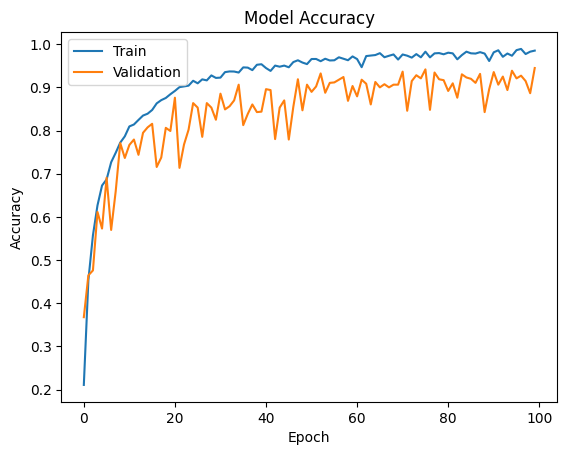

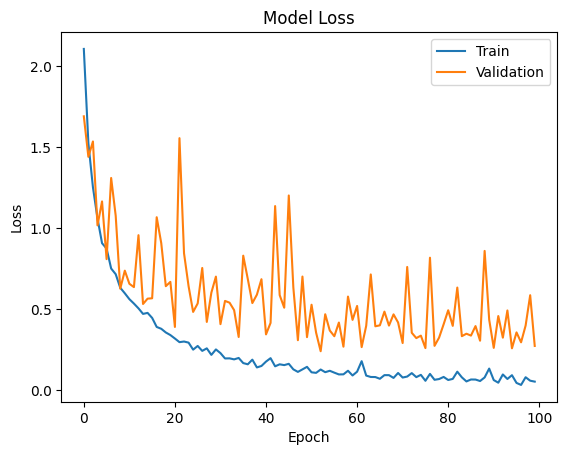

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [20]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

15/15 [==============================] - 12s 851ms/step - loss: 0.1941 - accuracy: 0.9594
Test Accuracy: 95.94%
Test Loss: 0.1941


In [21]:
model.save('tomato1.h5')

C:\Users\MANAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 60ms/step
We Process 64 in 0.18507623672485352.


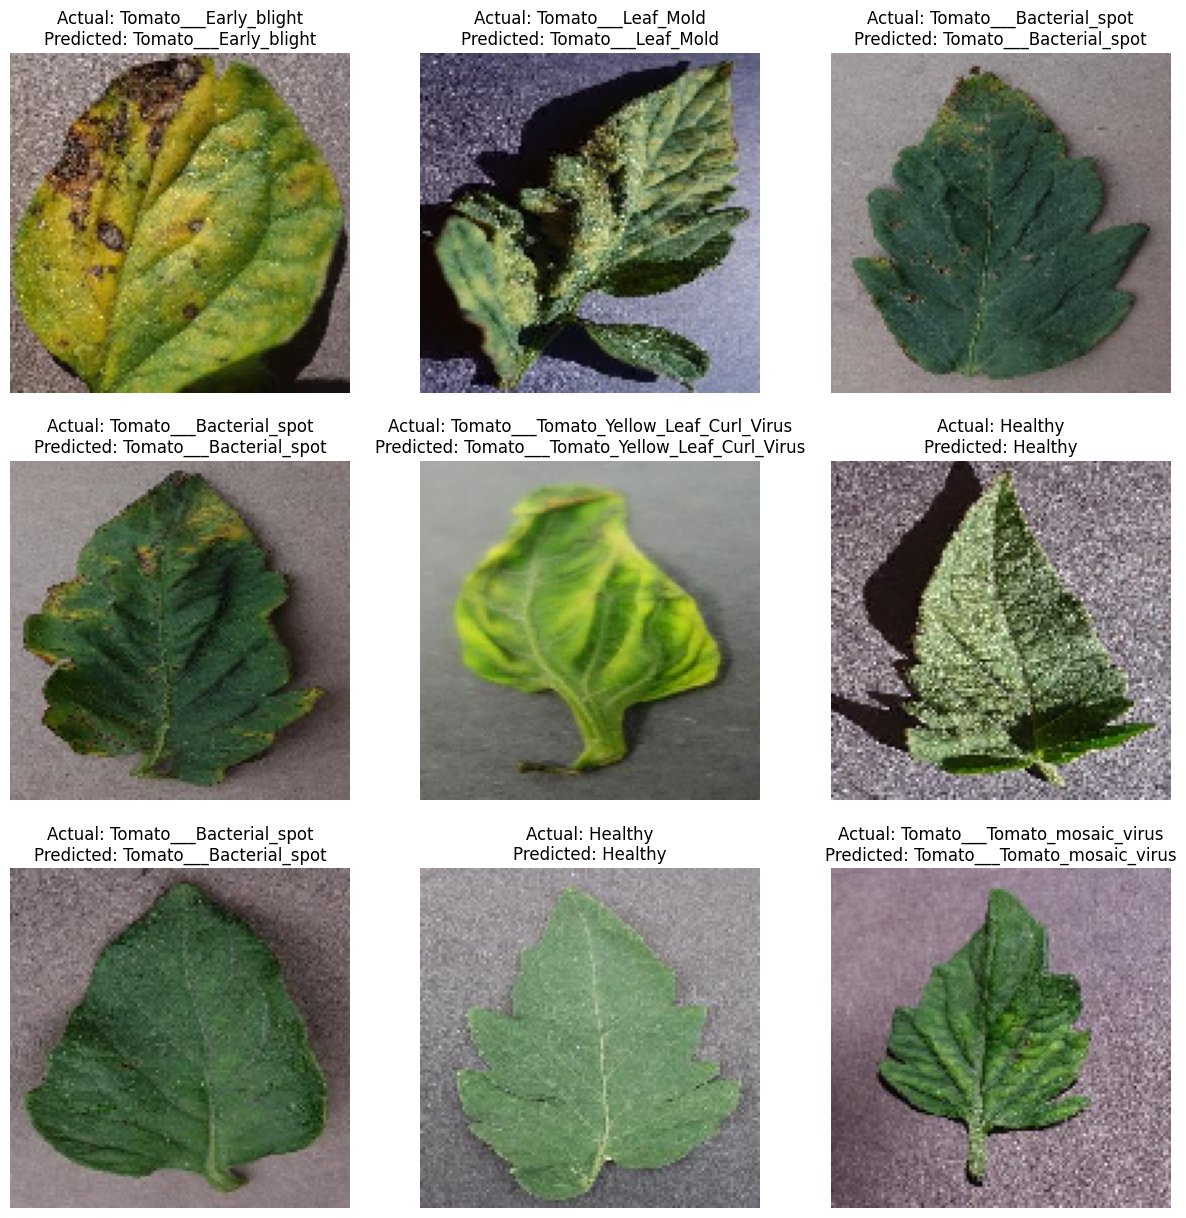

In [24]:
num_samples = 9

test_images, test_labels = next(test_generator)
tic = time.time()
predicted_labels = model.predict(test_images)
toc = time.time()
print(f"We Process {len(test_images)} in {toc-tic}.")
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])

    actual_class_index = np.argmax(test_labels[i])
    actual_class_name = class_names[actual_class_index]

    predicted_class_index = np.argmax(predicted_labels[i])
    predicted_class_name = class_names[predicted_class_index]

    title = f'Actual: {actual_class_name}\nPredicted: {predicted_class_name}'
    plt.title(title)
    plt.axis('off')

plt.show()

C:\Users\MANAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
